1.Model Measurement Analysis: Using any dataset, calculate TP, TN, FP ,FN and different
metrics (Accuracy, Precision, Recall(Sensitivity), F1-Score, MCC, Specificity, Negative
Predictive Value) by defining your own functions. Compare your values with scikit-learn's
library functions. Get the result of Confusion Matrix using sklearn. Using sklearn, plot the
ROC & AUC Curves for your test data and random probabilities. Using sklearn, calculate the
AUC of your test data and of random probabilities. Interpret the results. Write the
inference/analysis of each output.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,matthews_corrcoef, roc_curve, roc_auc_score, ConfusionMatrixDisplay,auc, RocCurveDisplay)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
# Generating a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
df = pd.DataFrame(X,y)
df.head(-3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,0.829274,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643
0,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,0.543479,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363
1,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,-0.549925,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212
1,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,-0.241431,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199
0,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,-0.695695,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,-1.859663,0.238110,-0.732300,-0.040606,0.052373,2.215174,0.781358,0.381245,-0.094269,-1.249565,1.045460,-0.201420,0.258930,-0.096212,-2.951344,0.536807,-0.684812,1.433634,-0.612322,0.777798
1,1.557679,0.250615,0.960740,1.158565,-0.764768,-0.250165,-1.861513,-1.490493,-0.841507,0.452290,0.242463,0.323755,0.481902,0.825224,-0.344499,1.356728,1.101220,0.448581,0.200816,1.767929
1,-0.155755,0.532570,2.874083,-1.888523,0.111694,-0.502838,0.266178,-0.164214,1.090979,0.367165,-1.097926,0.260706,0.794926,-1.070255,-0.762866,1.944018,-0.086546,1.103083,0.417324,-1.544621
0,0.519359,1.874906,0.078118,0.081083,0.201653,-2.756306,0.400236,-1.073689,-0.589452,-1.404240,-1.029972,0.046079,2.539382,-0.480648,-1.630771,-0.039894,1.673364,-0.134180,1.792044,0.248325


In [4]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Training a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class '1'

In [7]:
# Custom function to calculate confusion matrix components and metrics
def custom_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    # True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[0, 0]
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall (Sensitivity)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # F1-Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # Negative Predictive Value (NPV)
    npv = TN / (TN + FN) if (TN + FN) > 0 else 0
    
    # Matthews Correlation Coefficient (MCC)
    mcc = (TP*TN - FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) if (np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) > 0 else 0
    
    return {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'Accuracy': accuracy, 'Precision': precision, 'Recall': recall,
        'F1-Score': f1, 'Specificity': specificity, 'NPV': npv, 'MCC': mcc
    }

In [8]:
# Calculating custom metrics
custom_results = custom_metrics(y_test, y_pred)

In [9]:
# Displaying custom metrics results
print("Custom Metrics Results:")
for metric, value in custom_results.items():
    print(f"{metric}: {value:.4f}")

Custom Metrics Results:
TP: 128.0000
TN: 127.0000
FP: 18.0000
FN: 27.0000
Accuracy: 0.8500
Precision: 0.8767
Recall: 0.8258
F1-Score: 0.8505
Specificity: 0.8759
NPV: 0.8247
MCC: 0.7015


In [10]:
# Extracting confusion matrix values
TP = custom_results['TP']
TN = custom_results['TN']
FP = custom_results['FP']
FN = custom_results['FN']

# Calculating and displaying metrics using scikit-learn functions
print("\nScikit-learn Metrics Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}")
print(f"Specificity: {TN / (TN + FP) if (TN + FP) > 0 else 0:.4f}")
print(f"NPV: {TN / (TN + FN) if (TN + FN) > 0 else 0:.4f}")



Scikit-learn Metrics Results:
Accuracy: 0.8500
Precision: 0.8767
Recall: 0.8258
F1-Score: 0.8505
MCC: 0.7015
Specificity: 0.8759
NPV: 0.8247


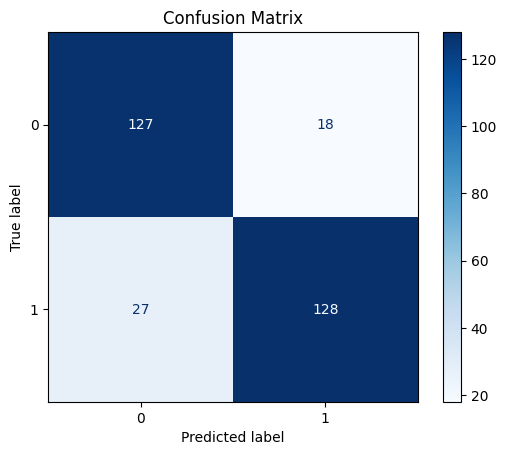

In [11]:
# Confusion Matrix using sklearn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

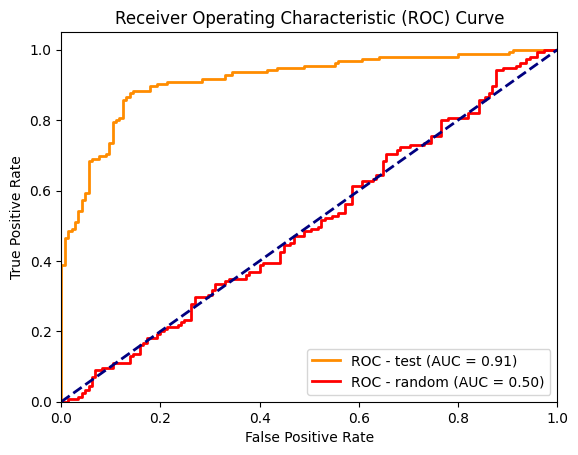

In [13]:
# 9. Plot ROC curve and calculate AUC
random_probs = np.random.rand(len(y_test))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

fprr,tprr,_=roc_curve(y_test,random_probs)
roc_aucr = auc(fprr,tprr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC - test (AUC = {roc_auc:.2f})')
plt.plot(fprr, tprr, color='red', lw=2, label=f'ROC - random (AUC = {roc_aucr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
# AUC calculation 
print(f"AUC for Test Data: {roc_auc:.4f}")
print(f"AUC for Random Probabilities: {roc_aucr:.4f}")

AUC for Test Data: 0.9142
AUC for Random Probabilities: 0.5019
